In [65]:
!pip install bar_chart_race
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 10.9 MB 17.9 MB/s 
     |████████████████████████████████| 596 kB 38.6 MB/s 
     |████████████████████████████████| 102 kB 12.3 MB/s 
     |████████████████████████████████| 675 kB 42.8 MB/s 
     |████████████████████████████████| 4.7 MB 59.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 812 kB 55.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=fdd7f2f067734b948a59e6a5ee2b6411a42aa51f6079343e54ed21a533765288
  Stored in directory: /tmp/pip-ephem-wheel-cache-zc1lddsv/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=dd4826da8408ddf8282132b82bf7d0d4e06e37d7de192d8233997e1e5b74632f
  Stored in directory: /r

In [1]:
from IPython.display import Video
from IPython.display import Image
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import bar_chart_race as bcr
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#C:\\Users\\oeb\\Desktop\\giza-egypt-chapter-analysing-open-data\\src\\data\\
pop_df = pd.read_csv("populationbyyear.csv")
pop_df.head(3)

Year     Total      Male     Femal     Rural    Urban
0  1950  20451978  10381760  10070228  14099948  6613383
1  1951  20948601  10638072  10310528  14320220  6894794
2  1952  21473798  10909309  10564483  14553593  7193215

## EDA

### generate report

In [3]:
pandas_profiling.ProfileReport(pop_df,title="simple report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**the data is clean, no missing values, nulls, or negative (non-logical) values**

**there is a strong positve co-relation between year and population (total, urban, rural, male, female) as excpected here in egypt we have bad distribution of population**



## animation 

In [6]:
df = pop_df.set_index('Year')
df=df.drop(labels='Total',axis=1)
df

Male     Femal     Rural     Urban
Year                                        
1950  10381760  10070228  14099948   6613383
1951  10638072  10310528  14320220   6894794
1952  10909309  10564483  14553593   7193215
1953  11195254  10832878  14800269   7508829
1954  11495505  11115997  15058949   7842649
...        ...       ...       ...       ...
2014  45697164  44727504  52480985  39331581
2015  46717678  45724871  53654843  40123329
2016  47729770  46717301  54799311  40889370
2017  48735775  47706815  55893406  41659745
2018  49733474  48690128  56938212  42437529

[69 rows x 4 columns]

In [7]:
bcr.bar_chart_race(df=df,title="population race over years")

**display the animation if not displayed already**

In [1]:
Video("popualtion_animation.mp4")

In [23]:
pop_df.Male[20]

17530808

MovieWriter ffmpeg unavailable; using Pillow instead.


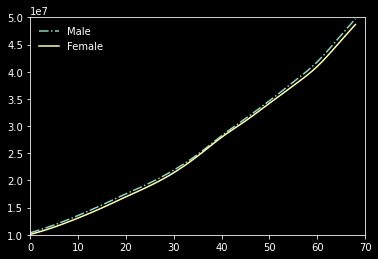

In [55]:
x_data ,y_data,y_data1 = [],  [],  []
def frame_update(i):
  # first line
  x_data.append(i)
  y_data.append(int(pop_df.Male[i]))
  # second line
  y_data1.append(int(pop_df.Femal[i]))

  line.set_xdata(x_data);  line1.set_xdata(x_data)
  line.set_ydata(y_data);  line1.set_ydata(y_data1)
  return line,line1

with plt.style.context('dark_background'):
  fig, ax = plt.subplots()
  ax.set_xlim(0, 70) # 5 e6
  ax.set_ylim(10000000, 50000000)	# 5 e6

  line, = ax.plot(0, pop_df.Male[0],'-.', label='Male')
  line1, = ax.plot(0, pop_df.Femal[0], label='Female')
  leg = ax.legend(loc='upper left', frameon=False)

  animation = FuncAnimation(fig, func=frame_update, frames=np.arange(0, 69), interval=200)
animation.save("pop_animation_Male_vs_Female.gif")

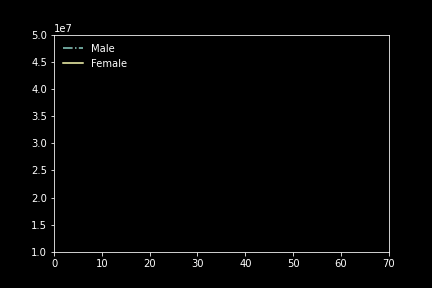

In [56]:
Image('pop_animation_Male_vs_Female.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


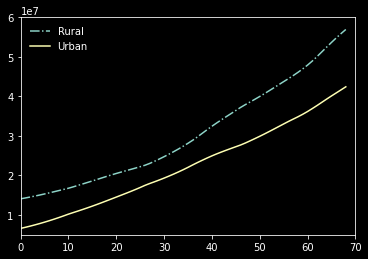

In [57]:
x_data ,y_data,y_data1 = [],  [],  []
def frame_update(i):
  # first line
  x_data.append(i)
  y_data.append(int(pop_df.Rural[i]))
  # second line
  y_data1.append(int(pop_df.Urban[i]))

  line.set_xdata(x_data);  line1.set_xdata(x_data)
  line.set_ydata(y_data);  line1.set_ydata(y_data1)
  return line,line1

with plt.style.context('dark_background'):
  fig, ax = plt.subplots()
  ax.set_xlim(0, 70) # 5 e6
  ax.set_ylim(5000000, 60000000)	# 5 e6

  line, = ax.plot(0, pop_df.Rural[0],'-.', label='Rural')
  line1, = ax.plot(0, pop_df.Urban[0], label='Urban')
  leg = ax.legend(loc='upper left', frameon=False)

  animation = FuncAnimation(fig, func=frame_update, frames=np.arange(0, 69), interval=200)
animation.save("pop_animation_rural_vs_urban.gif")

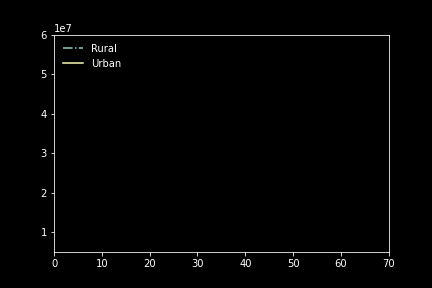

In [58]:
Image('pop_animation_rural_vs_urban.gif')

## Model

just for fun there is no need for AI here

In [8]:
X = pop_df.drop('Year',axis=1)
Y = pop_df.Total
x_train = X.head(60)
x_val = X.tail(9)
y_train = Y.head(60)
y_val = Y.tail(9)

In [9]:
pop_df.corr().loc['Total']

Year     0.989446
Total    1.000000
Male     0.999979
Femal    0.999979
Rural    0.998961
Urban    0.997872
Name: Total, dtype: float64

In [10]:
Model = LinearRegression()

In [11]:
Model.fit(x_train,y_train)

LinearRegression()

In [12]:
Model.score(x_val,y_val)

1.0

In [13]:
MAE = mean_absolute_error(y_true = y_val,y_pred = Model.predict(x_val))
print(f'Mean Absolute Error is {MAE}')

Mean Absolute Error is 1.3245476616753471e-08
